In [168]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns




In [169]:
df=pd.read_csv('Used_Bikes.csv')# read the Used the Used_bikes file
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [170]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [171]:
df.isnull().sum()#to find the null value

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [172]:
df.duplicated().sum()# for duplicate value

np.int64(25324)

In [173]:
df.shape#for shape

(32648, 8)

In [174]:
df.shape[0]-df.duplicated().sum() #for without duplicate value

np.int64(7324)

In [175]:
df.drop_duplicates(inplace=True)# for remove duplicate value

In [176]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
9369,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
9370,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
9371,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj


In [177]:
df.isnull().sum()


bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [178]:
cat_col=df.select_dtypes(include='O')#string only
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [179]:
num_col=df.select_dtypes(exclude='O')#onlt without objective
num_col

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0
...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0
9369,35000.0,60000.0,9.0,220.0
9370,450000.0,3430.0,4.0,750.0
9371,139000.0,21300.0,4.0,400.0


In [180]:
cat_col.isnull().sum()

bike_name    0
city         0
owner        0
brand        0
dtype: int64

In [181]:
num_col.isnull().sum()

price         0
kms_driven    0
age           0
power         0
dtype: int64

In [182]:
df["bike_name"].nunique()# without duplicate

471

In [183]:
cat_col=cat_col.drop(["bike_name","city"],axis='columns')
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [184]:
cat_col['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [185]:
dct = {'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth Owner Or More':3}
dct

{'First Owner': 0,
 'Second Owner': 1,
 'Third Owner': 2,
 'Fourth Owner Or More': 3}

In [186]:
cat_col['owner']=cat_col['owner'].map(dct)

In [187]:
# cat_col['owner'].value_counts()

In [188]:
# lav={"First Owner":1,'Second Owner':2,"Third Owner":3,'Fourth Owner Or More':4}
# lav

In [189]:
# cat_col['owner']=cat_col['owner'].map(lav)

In [190]:
cat_col.isnull().sum()

owner    0
brand    0
dtype: int64

In [191]:
cat_col['owner'].value_counts()

owner
0    6642
1     588
2      84
3      10
Name: count, dtype: int64

In [192]:
cat_col['brand'].value_counts()


brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [166]:
# cat_col["brand"].unique()

array([ 1.,  2.,  3.,  4., nan,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 21., 22., 20., 23.])

In [193]:
dt1={"TVS":1,"Royal Enfield":2,"Triumph":3,'Yamaha':4,"Honda":5,'Hero':6,'Bajaj':7,'Suzuki':8,'Benelli':9,'KTM':10 ,"Mahindra":11,'Kawasaki':12,'Ducati':13,'Hyosung': 14,'Harley-Davidson': 15,'Jawa':16,'BMW':17,"Indian":18,"Rajdoot":19,"LML": 21,"Yezdi":22,"MV" :20,"Ideal":23 }               
 
dt1

{'TVS': 1,
 'Royal Enfield': 2,
 'Triumph': 3,
 'Yamaha': 4,
 'Honda': 5,
 'Hero': 6,
 'Bajaj': 7,
 'Suzuki': 8,
 'Benelli': 9,
 'KTM': 10,
 'Mahindra': 11,
 'Kawasaki': 12,
 'Ducati': 13,
 'Hyosung': 14,
 'Harley-Davidson': 15,
 'Jawa': 16,
 'BMW': 17,
 'Indian': 18,
 'Rajdoot': 19,
 'LML': 21,
 'Yezdi': 22,
 'MV': 20,
 'Ideal': 23}

In [194]:
cat_col["brand"]=cat_col["brand"].map(dt1)


In [195]:
cat_col.isnull().sum()

owner    0
brand    0
dtype: int64

In [196]:
# cat_col['brand'].value_counts()
cat_col["brand"].isnull().sum()

np.int64(0)

In [197]:
cat_col

,owner,brand
0,0,1
1,0,2
2,0,3
3,0,1
4,0,4
...,...,...
9362,0,6
9369,0,7
9370,0,15
9371,0,7


In [198]:
num_col

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0
...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0
9369,35000.0,60000.0,9.0,220.0
9370,450000.0,3430.0,4.0,750.0
9371,139000.0,21300.0,4.0,400.0


In [199]:
complete_df=pd.concat([cat_col,num_col],axis=1)#sum the two data set
complete_df

,owner,brand,price,kms_driven,age,power
0,0,1,35000.0,17654.0,3.0,110.0
1,0,2,119900.0,11000.0,4.0,350.0
2,0,3,600000.0,110.0,8.0,675.0
3,0,1,65000.0,16329.0,4.0,180.0
4,0,4,80000.0,10000.0,3.0,150.0
...,...,...,...,...,...,...
9362,0,6,25000.0,48587.0,8.0,150.0
9369,0,7,35000.0,60000.0,9.0,220.0
9370,0,15,450000.0,3430.0,4.0,750.0
9371,0,7,139000.0,21300.0,4.0,400.0


In [200]:
complete_df.head()

,owner,brand,price,kms_driven,age,power
0,0,1,35000.0,17654.0,3.0,110.0
1,0,2,119900.0,11000.0,4.0,350.0
2,0,3,600000.0,110.0,8.0,675.0
3,0,1,65000.0,16329.0,4.0,180.0
4,0,4,80000.0,10000.0,3.0,150.0


In [201]:
complete_df.dtypes

owner           int64
brand           int64
price         float64
kms_driven    float64
age           float64
power         float64
dtype: object

In [202]:
matrix=complete_df.corr()
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.006165,-0.005188,0.062612,0.203151,0.043746
brand,0.006165,1.000000,0.285940,-0.035977,-0.029604,0.067513
price,-0.005188,0.285940,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.035977,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.029604,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.067513,0.807641,-0.168295,-0.164211,1.000000


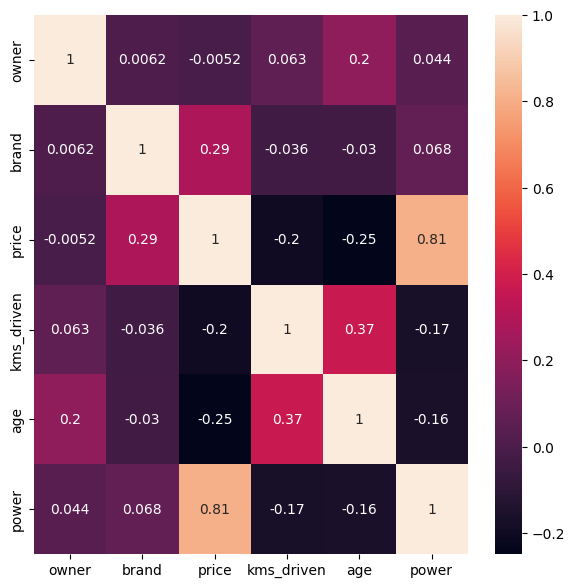

In [203]:
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True)
plt.show()

In [204]:
complete_df

,owner,brand,price,kms_driven,age,power
0,0,1,35000.0,17654.0,3.0,110.0
1,0,2,119900.0,11000.0,4.0,350.0
2,0,3,600000.0,110.0,8.0,675.0
3,0,1,65000.0,16329.0,4.0,180.0
4,0,4,80000.0,10000.0,3.0,150.0
...,...,...,...,...,...,...
9362,0,6,25000.0,48587.0,8.0,150.0
9369,0,7,35000.0,60000.0,9.0,220.0
9370,0,15,450000.0,3430.0,4.0,750.0
9371,0,7,139000.0,21300.0,4.0,400.0


In [205]:
x=complete_df.drop("price",axis=1)
y=complete_df[['price']]

In [206]:
x

,owner,brand,kms_driven,age,power
0,0,1,17654.0,3.0,110.0
1,0,2,11000.0,4.0,350.0
2,0,3,110.0,8.0,675.0
3,0,1,16329.0,4.0,180.0
4,0,4,10000.0,3.0,150.0
...,...,...,...,...,...
9362,0,6,48587.0,8.0,150.0
9369,0,7,60000.0,9.0,220.0
9370,0,15,3430.0,4.0,750.0
9371,0,7,21300.0,4.0,400.0


In [207]:
y

,price
0,35000.0
1,119900.0
2,600000.0
3,65000.0
4,80000.0
...,...
9362,25000.0
9369,35000.0
9370,450000.0
9371,139000.0


In [208]:
from sklearn.model_selection import train_test_split


In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [210]:
x_train

,owner,brand,kms_driven,age,power
5789,0,1,68857.0,15.0,110.0
3451,0,2,5740.0,6.0,500.0
735,0,6,28329.0,6.0,110.0
7533,0,4,42966.0,7.0,150.0
8461,0,2,8000.0,5.0,500.0
...,...,...,...,...,...
6522,0,7,56000.0,9.0,200.0
6583,0,2,22493.0,5.0,500.0
6856,0,7,17477.0,5.0,150.0
1028,0,4,14836.0,8.0,150.0


In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
lr=LinearRegression()

In [213]:
x_train.isnull().sum()


owner         0
brand         0
kms_driven    0
age           0
power         0
dtype: int64

In [214]:
y_train.isnull().sum()

price    0
dtype: int64

In [215]:
lr.fit(x_train,y_train)

LinearRegression()

In [216]:
lr.score(x_train,y_train)

0.7047357015688642

In [217]:
lr.score(x_test,y_test)

0.7578390489980575